[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: eye color
Quantitative: age
Discrete: Number of people
Continuous: height of a person

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

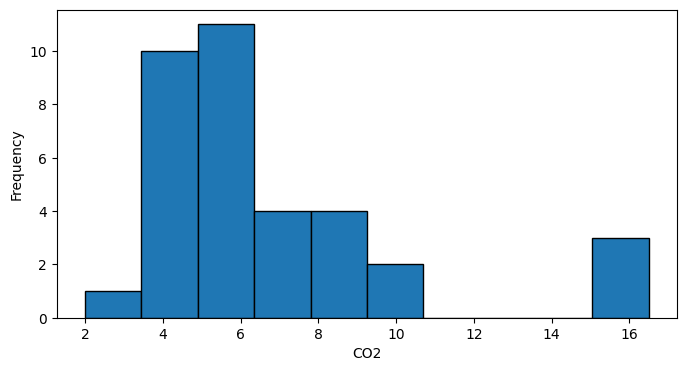

In [24]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"],bins=10, edgecolor='black')
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.show()

Part b. Find the mean, median, and standard deviation.

In [25]:

print("Mean:", np.mean(carbon_west["CO2"]))
print("Median:", np.median(carbon_west["CO2"]))
print("Standard Deviation:", np.std(carbon_west["CO2"]))


Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [26]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [27]:


murders_no_dc = murders[murders["state"] != "DC"]

mean_murders = np.mean(murders_no_dc["murder"])
std = np.std(murders_no_dc["murder"])

print("Mean:", mean_murders)
print("STD: ", std)


Mean: 4.874
STD:  2.560297638947472


Part b. Find the five-number  summary without D.C.

In [28]:
print("Minimum: ", np.min(murders_no_dc["murder"]))
print("First Quartile: ", np.percentile(murders_no_dc["murder"], 25))
print("Median: ", np.median(murders_no_dc["murder"]))
print("Third Quartile: ", np.percentile(murders_no_dc["murder"], 75))
print("Maximum: ", np.max(murders_no_dc["murder"]))

Minimum:  1.0
First Quartile:  2.625
Median:  4.85
Third Quartile:  6.175
Maximum:  12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [29]:
print("Minimum: ", np.min(murders["murder"]))
print("First Quartile: ", np.percentile(murders["murder"], 25))
print("Median: ", np.median(murders["murder"]))
print("Third Quartile: ", np.percentile(murders["murder"], 75))
print("Maximum: ", np.max(murders["murder"]))
print()
print("Mean: ", np.mean(murders["murder"]))
print("Median: ", np.median(murders["murder"]))

Minimum:  1.0
First Quartile:  2.6500000000000004
Median:  5.0
Third Quartile:  6.45
Maximum:  24.2

Mean:  5.252941176470588
Median:  5.0


The mean was affected more than the median, and the range was effected more than the inter-quartile range.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [30]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head(10)

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
5,6,749.85,3153,1,2997,3,2
6,7,398.25,1355,0,4054,3,2
7,8,434.85,2075,1,3002,3,2
8,9,880.50,3990,0,6627,5,4
9,10,105.00,1160,0,320,3,2


Part a. Construct a scatterplot between square feet and price of a home.

Part b. Find the correlation between the two variables.

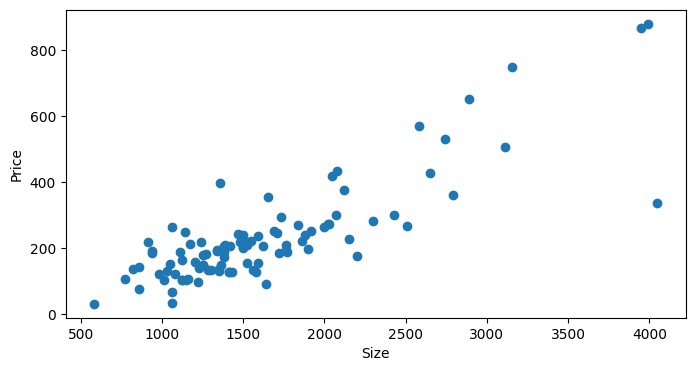

In [31]:
plt.figure(figsize=(8, 4))
plt.scatter(houses["size"], houses["price"])
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

Part c. Find and plot the regression line on top of the scatterplot.

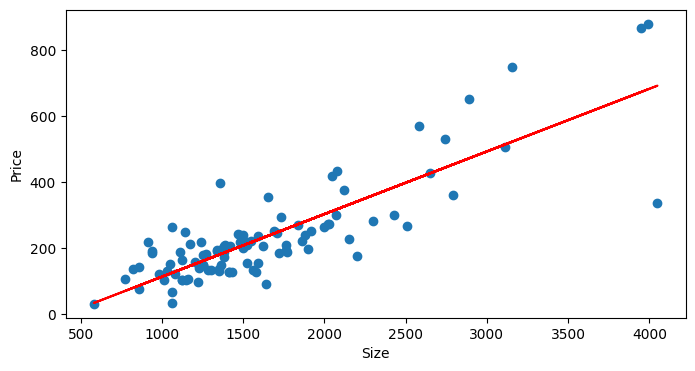

In [32]:

x = houses["size"].values.reshape(-1, 1)
y = houses["price"]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(8, 4))
plt.scatter(houses["size"], houses["price"])
plt.plot(x, y_pred, color='red')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()


Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

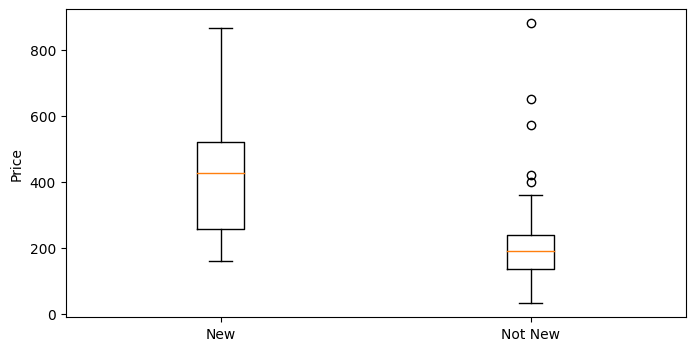

In [33]:
plt.figure(figsize=(8, 4))
plt.boxplot([houses[houses["new"] == 1]["price"], houses[houses["new"] == 0]["price"]], labels=["New", "Not New"])
plt.ylabel("Price")
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The regression line on the scatterplot shows that as size goes up, price increases.
Each of the five numbers representing price from the summary shown in the box plot show are greater in the new houses as opposed to not new houses. This means that new houses have higher prices on average.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [34]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [35]:
pd.crosstab(happy["marital"], happy["happiness"])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
